Линейные модели в машинном обучении:

Цель: разработать модель машинного обучения, которая поможет управлять рисками на ферме и принимать объективное решение о покупке коров.

1. Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:

id — уникальный идентификатор коровы.

Удой, кг — масса молока, которую корова даёт в год (в килограммах).

ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.

Сырой протеин, г — содержание сырого протеина в корме (в граммах).

СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Жирность,% — содержание жиров в молоке (в процентах).

Белок,% — содержание белков в молоке (в процентах).

Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

2. Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:

id — уникальный идентификатор коровы.

Имя Папы — имя папы коровы.

3. Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Имя_папы — имя папы коровы.

Текущая_жирность,% — содержание жиров в молоке (в процентах).

Текущий_уровень_белок,% — содержание белков в молоке (в процентах).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


Надо сделать следующее:
1. Предобработка данных
2. Исследовательский анализ данных
3. Проведите корреляционный анализ признаков в датасете `ferma_main.csv`
4. Обучить 3 модели линейной регрессии с целевым признаком "удой" и выбрать лучшую:

A. Обучить модель на подготовленных данных

B. Обучить модель с учетом нелинейной связи входных признаков с целевым признаком

С. Обучить модель с новым признаком "Имя Папы" и с выполнением предыдущих пунктов

5. Обучить модель *LogisticRegression* в датасете `ferma_main.csv` с целевым признаком `Вкус молока`

6. Выводы

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    confusion_matrix,
    recall_score,
    precision_score
)

from sklearn.svm import SVC

## Загрузка данных

In [2]:
main_df = pd.read_csv('/datasets/ferma_main.csv', sep=';')
sire_df = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_df = pd.read_csv('/datasets/cow_buy.csv', sep=';')

In [3]:
main_df_orig = main_df
sire_df_orig = sire_df
cow_df_orig = cow_df

In [4]:
display(main_df)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [5]:
display(sire_df)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [6]:
display(cow_df)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


В основном файле 634 строки и 12 колонок. Видны дубликаты из-за которых таблицы main_df и sire_df не совпадают. Названия всех колонок надо привести к принятому виду.

In [7]:
#изучим основную информацию
print(main_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

В столбцах 2, 4, 8, 9 несоответствие типа данных. Пропусков нет.

In [8]:
print(sire_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


Таблица с имена в порядке

In [9]:
print(cow_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None


В столбцах 4, 5 несоответствие типа данных.

Итого: привести названия столбцов к общему виду, разобраться с явными и неявными дубликатами, привести типы данных к правильному виду. Пропуски отсутствуют. 

##  Предобработка данных

Изменим названия столбцов:

In [10]:
main_df.columns = ['id', 'yield_kg', 'efu_energy_feed_unit',  
 'crude_protein_g', 'sugar_protein_ratio', 'breed',  
 'pasture_type', 'sire_breed', 'fat_content_percent', 'protein_percent',  
 'milk_taste', 'age']

sire_df.columns = ['id', 'sire_name']

cow_df.columns = ['breed', 'pasture_type', 'sire_breed', 'sire_name',  
 'current_fat_content_percent', 'current_protein_level_percent', 'age']

Найдем пропуски:

In [11]:
print(main_df.isna().sum())
print(sire_df.isna().sum())
print(cow_df.isna().sum())

id                      0
yield_kg                0
efu_energy_feed_unit    0
crude_protein_g         0
sugar_protein_ratio     0
breed                   0
pasture_type            0
sire_breed              0
fat_content_percent     0
protein_percent         0
milk_taste              0
age                     0
dtype: int64
id           0
sire_name    0
dtype: int64
breed                            0
pasture_type                     0
sire_breed                       0
sire_name                        0
current_fat_content_percent      0
current_protein_level_percent    0
age                              0
dtype: int64


Найдем и удалим дубликаты:

In [12]:
print(main_df.duplicated().sum())
print(sire_df.duplicated().sum())
print(cow_df.duplicated().sum())

5
0
4


In [13]:
main_df = main_df.drop_duplicates().reset_index(drop=True)
cow_df = cow_df.drop_duplicates().reset_index(drop=True)

Приведем значения таблиц к правильным типам:

In [14]:
main_df[['efu_energy_feed_unit', 'sugar_protein_ratio', 'fat_content_percent', 'protein_percent']] = \
main_df[['efu_energy_feed_unit', 'sugar_protein_ratio', 
         'fat_content_percent','protein_percent']].replace(',', '.', regex=True).astype('float64')

cow_df[['current_fat_content_percent', 'current_protein_level_percent']] = \
cow_df[['current_fat_content_percent', 'current_protein_level_percent']].replace(',', '.', regex=True).astype('float64')

Проверим данные:

In [15]:
print(main_df.describe(include='all'))

               id      yield_kg  efu_energy_feed_unit  crude_protein_g  \
count   629.00000    629.000000            629.000000       629.000000   
unique        NaN           NaN                   NaN              NaN   
top           NaN           NaN                   NaN              NaN   
freq          NaN           NaN                   NaN              NaN   
mean    315.00000   6188.750397             14.543879      1923.364070   
std     181.72094   1644.795489              1.306408       182.956251   
min       1.00000   5204.000000             10.900000      1660.000000   
25%     158.00000   5751.000000             13.500000      1771.000000   
50%     315.00000   6133.000000             14.700000      1888.000000   
75%     472.00000   6501.000000             15.600000      2062.000000   
max     629.00000  45616.000000             16.800000      2349.000000   

        sugar_protein_ratio           breed pasture_type sire_breed  \
count            629.000000             

Есть странные значения в `yield_kg`

In [16]:
main_df.query('yield_kg > 10000')

,id,yield_kg,efu_energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_content_percent,protein_percent,milk_taste,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.22,3.076,вкусно,более_2_лет


Если забыли поставить запятую, то при делении на 10 это значение все равно выбъется из общей картины, став минимальным. Удалим эту строку.

In [17]:
main_df = main_df[main_df['yield_kg'] != 45616].reset_index(drop=True)

In [18]:
print(cow_df.describe(include='all'))

                  breed pasture_type sire_breed sire_name  \
count                16           16         16        16   
unique                2            2          2         4   
top     РефлешнСоверинг    равнинное    Соверин    Буйный   
freq                  8            8         10         7   
mean                NaN          NaN        NaN       NaN   
std                 NaN          NaN        NaN       NaN   
min                 NaN          NaN        NaN       NaN   
25%                 NaN          NaN        NaN       NaN   
50%                 NaN          NaN        NaN       NaN   
75%                 NaN          NaN        NaN       NaN   
max                 NaN          NaN        NaN       NaN   

        current_fat_content_percent  current_protein_level_percent  \
count                     16.000000                      16.000000   
unique                          NaN                            NaN   
top                             NaN                      

Проверим таблицы на наличие неявных дубликатов. Для этого создадим две функции: функция *categorize_columns* разделяет столбцы на категориальные и числовые без учета столбца `id`, функция *uniques* выводит уникальные значения категориального столбца.

In [19]:
def categorize_columns(df):
    df = df.drop('id', axis=1, errors='ignore')
    num_cols = [] 
    cat_cols = []  
    for col in df.columns:
        if df.dtypes[col] == 'O':
            cat_cols.append(col)
        else:
            num_cols.append(col) 
    return num_cols, cat_cols

In [20]:
def uniques(df):
    for col in categorize_columns(df)[1]:
        unique_values = df[col].unique()
        print(f"Уникальные значения в столбце '{col}': {unique_values}")

In [21]:
uniques(main_df)

Уникальные значения в столбце 'breed': ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце 'pasture_type': ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в столбце 'sire_breed': ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения в столбце 'milk_taste': ['вкусно' 'не вкусно']
Уникальные значения в столбце 'age': ['более_2_лет' 'менее_2_лет']


In [22]:
uniques(sire_df)

Уникальные значения в столбце 'sire_name': ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


In [23]:
uniques(cow_df)

Уникальные значения в столбце 'breed': ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце 'pasture_type': ['холмистое' 'равнинное']
Уникальные значения в столбце 'sire_breed': ['Айдиал' 'Соверин']
Уникальные значения в столбце 'sire_name': ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Уникальные значения в столбце 'age': ['более_2_лет' 'менее_2_лет']


Надо устранить выявленные дубликаты в `main_df`:

In [24]:
main_df['sire_breed'] = main_df['sire_breed'].replace('Айдиалл', 'Айдиал')
main_df['pasture_type'] = main_df['pasture_type'].replace('Равнинные', 'Равнинное')

Исправим данные в cow_df:

In [25]:
cow_df['pasture_type'] = cow_df['pasture_type'].str.capitalize()

Добавим недостающие признаки из main_df в cow_df:

По такому принципу будем решать куда что добавлять:

In [26]:
main_df.groupby(['breed', 'pasture_type', 'age'])[['efu_energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio']].mean()

efu_energy_feed_unit  \
breed           pasture_type age                                 
Вис Бик Айдиал  Равнинное    более_2_лет             14.780851   
                             менее_2_лет             12.941304   
                Холмистое    более_2_лет             14.825157   
                             менее_2_лет             12.953846   
РефлешнСоверинг Равнинное    более_2_лет             14.902597   
                             менее_2_лет             12.707143   
                Холмистое    более_2_лет             15.034043   
                             менее_2_лет             13.250000   

                                          crude_protein_g  sugar_protein_ratio  
breed           pasture_type age                                                
Вис Бик Айдиал  Равнинное    более_2_лет      1934.503546             0.920284  
                             менее_2_лет      1809.456522             0.875652  
                Холмистое    более_2_лет      1961.735849             0.919969  
                             менее_2_лет      1819.192308             0.874615  
РефлешнСоверинг Равнинное    более_2_лет      1943.623377             0.922013  
                             менее_2_лет      1797.142857             0.871071  
                Холмистое    более_2_лет      1948.829787             0.923333  
                             менее_2_лет      1804.250000             0.874375

In [27]:
#Создадим пустые столбцы:
cow_df['efu_energy_feed_unit'] = np.nan
cow_df['crude_protein_g'] = np.nan
cow_df['sugar_protein_ratio'] = np.nan
cow_df['milk_taste'] = np.nan
cow_df.groupby(['breed', 'pasture_type', 'age'])[['efu_energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio']].mean()

efu_energy_feed_unit  \
breed           pasture_type age                                 
Вис Бик Айдиал  Равнинное    более_2_лет                   NaN   
                             менее_2_лет                   NaN   
                Холмистое    более_2_лет                   NaN   
                             менее_2_лет                   NaN   
РефлешнСоверинг Равнинное    более_2_лет                   NaN   
                             менее_2_лет                   NaN   
                Холмистое    более_2_лет                   NaN   
                             менее_2_лет                   NaN   

                                          crude_protein_g  sugar_protein_ratio  
breed           pasture_type age                                                
Вис Бик Айдиал  Равнинное    более_2_лет              NaN                  NaN  
                             менее_2_лет              NaN                  NaN  
                Холмистое    более_2_лет              NaN                  NaN  
                             менее_2_лет              NaN                  NaN  
РефлешнСоверинг Равнинное    более_2_лет              NaN                  NaN  
                             менее_2_лет              NaN                  NaN  
                Холмистое    более_2_лет              NaN                  NaN  
                             менее_2_лет              NaN                  NaN

In [28]:
#Применим метод transform к каждому нужному столбцу для заполнения. Сделаем с помощью цикла.
#Увелеичим столбцы на 5% по заданию:
cols = ['efu_energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio']
for col in cols:
    cow_df[col] = cow_df[col].fillna(main_df.groupby(['breed', 'pasture_type', 'age'])[col].transform('mean'))
    cow_df[col] = cow_df[col]*1.05


cow_df

,breed,pasture_type,sire_breed,sire_name,current_fat_content_percent,current_protein_level_percent,age,efu_energy_feed_unit,crude_protein_g,sugar_protein_ratio,milk_taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.519894,2031.228723,0.966298,NaN
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,13.588370,1899.929348,0.919435,NaN
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.785745,2046.271277,0.969500,NaN
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.785745,2046.271277,0.969500,NaN
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,13.588370,1899.929348,0.919435,NaN
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,13.912500,1894.462500,0.918094,NaN
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.519894,2031.228723,0.966298,NaN
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.519894,2031.228723,0.966298,NaN
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.785745,2046.271277,0.969500,NaN
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,13.601538,1910.151923,0.918346,NaN


Надо добавить значения столбца milk_taste, чтобы массивы имели одинаковое количество столбцов:

(Можно было бы наоборот удалить столбец из обучающего датафрейма, но это понижает точность)

In [29]:
main_df.groupby(['breed', 'pasture_type', 'age'])['milk_taste'].agg(lambda x: x.mode()[0])

breed            pasture_type  age        
Вис Бик Айдиал   Равнинное     более_2_лет       вкусно
                               менее_2_лет    не вкусно
                 Холмистое     более_2_лет       вкусно
                               менее_2_лет       вкусно
РефлешнСоверинг  Равнинное     более_2_лет       вкусно
                               менее_2_лет    не вкусно
                 Холмистое     более_2_лет       вкусно
                               менее_2_лет       вкусно
Name: milk_taste, dtype: object

Заполним `milk_taste` модой из сгруппированных столбов основного датафрейма:

In [30]:
cow_df['milk_taste'] = cow_df['milk_taste'].fillna(main_df.groupby(['breed', 'pasture_type', 'age'])['milk_taste'].transform(lambda x: x.mode()[0]))
cow_df

,breed,pasture_type,sire_breed,sire_name,current_fat_content_percent,current_protein_level_percent,age,efu_energy_feed_unit,crude_protein_g,sugar_protein_ratio,milk_taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.519894,2031.228723,0.966298,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,13.588370,1899.929348,0.919435,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.785745,2046.271277,0.969500,вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.785745,2046.271277,0.969500,вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,13.588370,1899.929348,0.919435,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,13.912500,1894.462500,0.918094,вкусно
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.519894,2031.228723,0.966298,вкусно
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.519894,2031.228723,0.966298,вкусно
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.785745,2046.271277,0.969500,вкусно
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,13.601538,1910.151923,0.918346,вкусно


Названия столбцов записаны в требуемом виде, явные дубликаты удалены, неявные дубликаты исправлены, пропуски не найдены, значения в таблицах придены к правильным типам. Удалено одно ошибочно записанное значение. В `cow_df` добавлены недостающие значения.

## Исследовательский анализ данных

Проведем статистический анализ всех признаков:

Функция для построения гистрограм для числовых столбцов:

In [31]:
def plot_hist(df):
    for col in categorize_columns(df)[0]:
        plt.hist(df[col])
        plt.xlabel(col);
        plt.ylabel('Количество');
        plt.title(f'Гистограмма по столбцу "{col}"')
        plt.grid(True)
        plt.show()

Функция для построения столбчатых диаграмм по категориальным столбцам:

In [32]:
def plot_bar(df):
    for col in categorize_columns(df)[1]:
        df[col].value_counts().plot(kind='bar', figsize=(10, 5))
        plt.title(f'Столбчатая диаграмма по столбцу "{col}"')
        plt.ylabel('Количество')
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

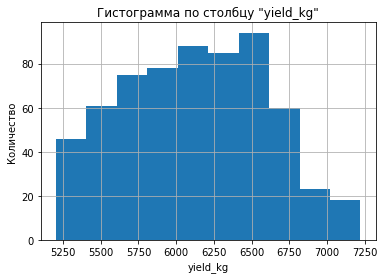

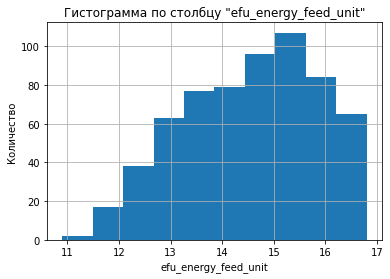

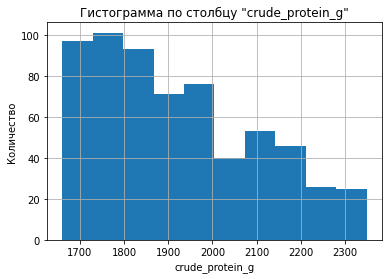

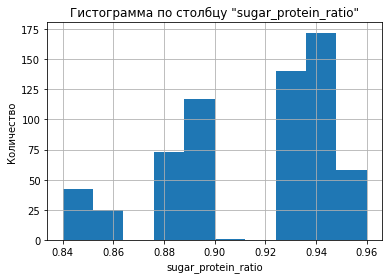

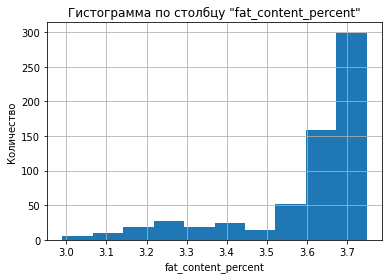

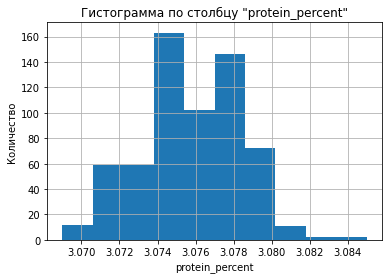

In [33]:
plot_hist(main_df)

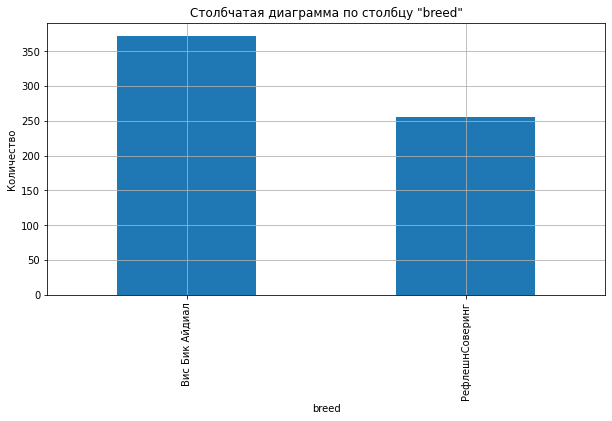

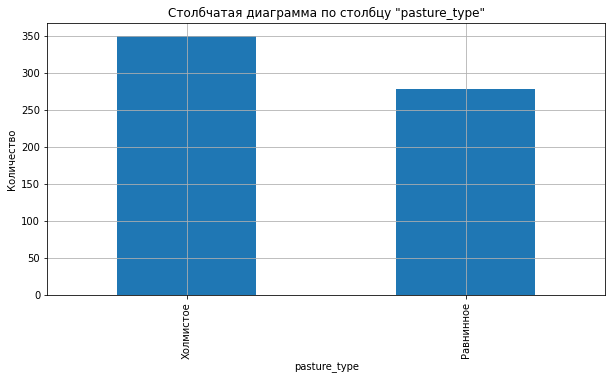

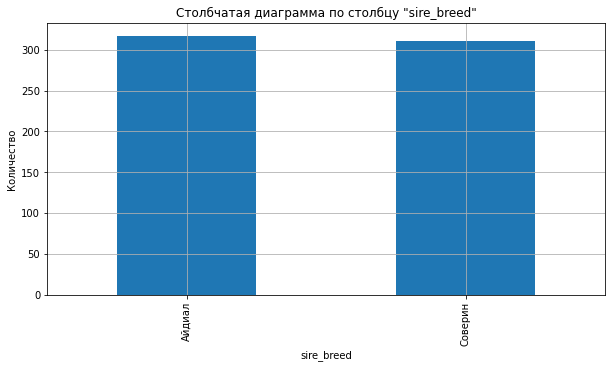

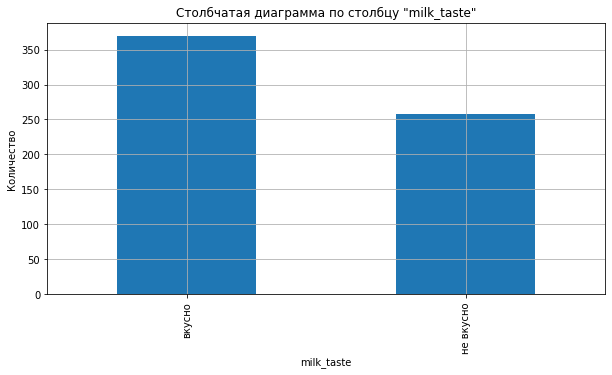

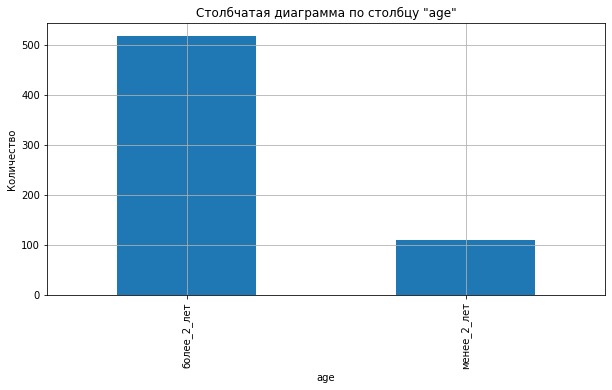

In [34]:
plot_bar(main_df)

`sugar_protein_ration` и `fat_content_percent` можно категоризировать.

Большинство животных, старше двух лет.

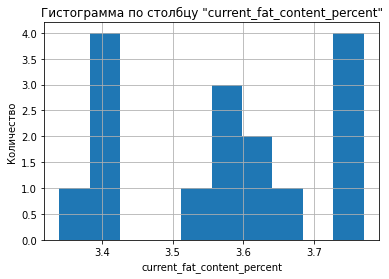

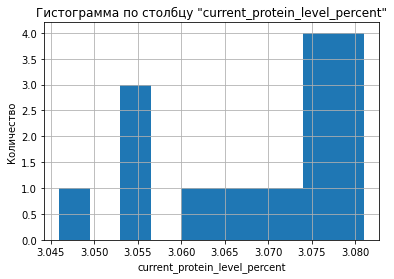

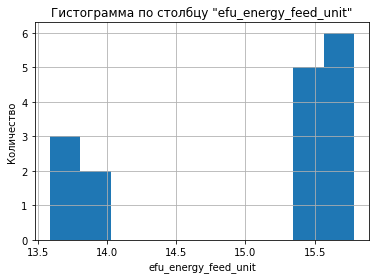

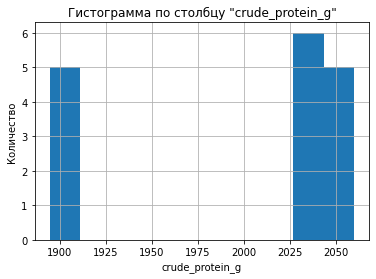

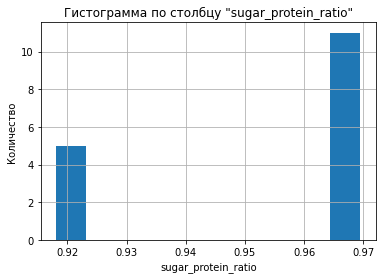

In [35]:
plot_hist(cow_df)

Такая дискретность наблюдается из-за малого разброса и в целом из-за группировки.

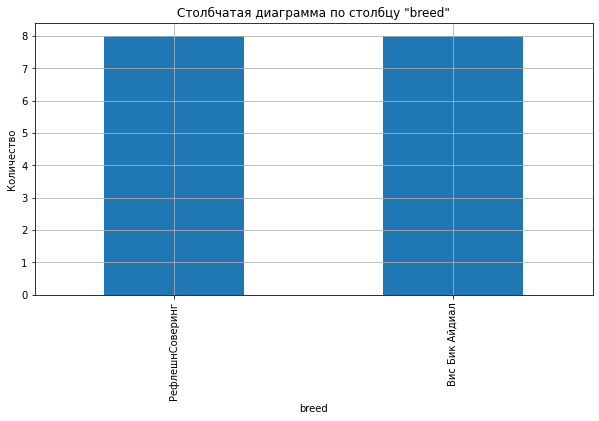

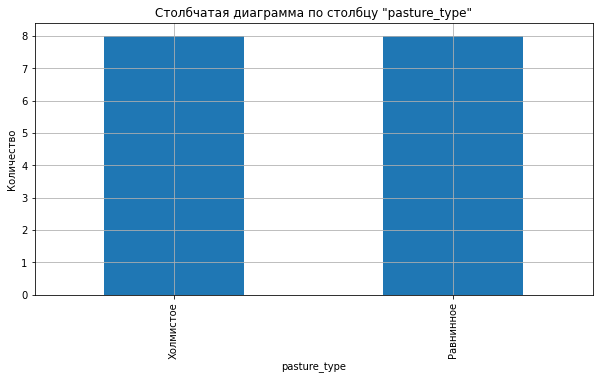

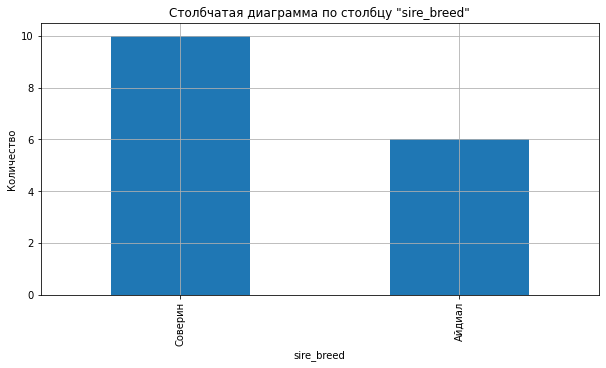

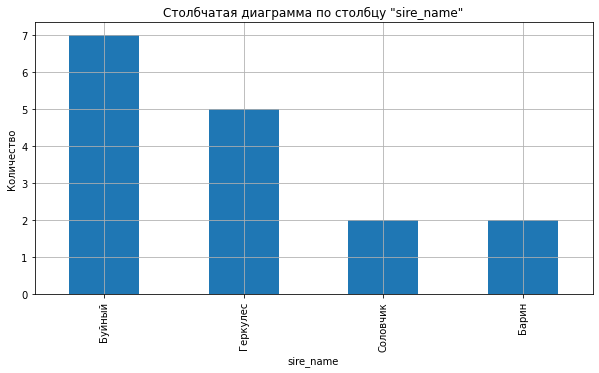

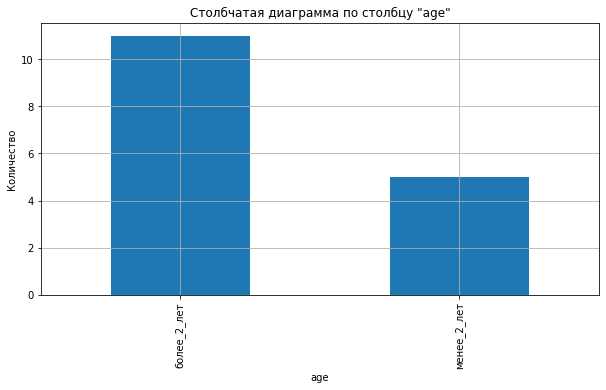

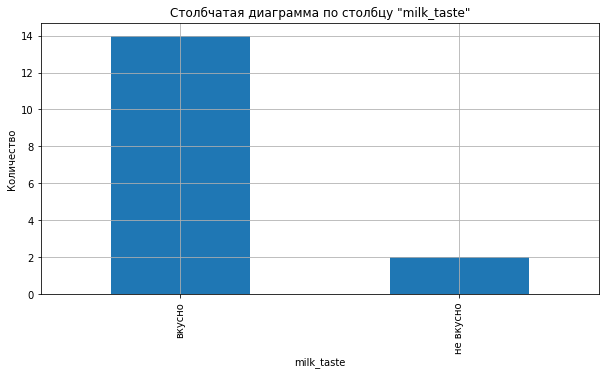

In [36]:
plot_bar(cow_df)

`main_df`: Кандидаты на категоризацию - `sugar_protein_ration` и `fat_content_percent`. По категориальным признакам почти везде равенство за исключением возраста - большинство коров старше 2 лет. Несмотря на такую разницу, это нельзя связать со вкусом молока, потому что так не такое сильное различие и вкус вообще может зависеть от факторов вне этих данных.
Все категориальные столбцы бинарные.

`cow_df`: Почти все данные получились дискретными из-за способа их подстановки.

## Корреляционный анализ

Сделаем матрицу корреляции и ее тепловую карту:

In [37]:
print(main_df.drop('id', axis = 1).corr())

                      yield_kg  efu_energy_feed_unit  crude_protein_g  \
yield_kg              1.000000              0.765098         0.446731   
efu_energy_feed_unit  0.765098              1.000000         0.387875   
crude_protein_g       0.446731              0.387875         1.000000   
sugar_protein_ratio   0.806339              0.749007         0.446332   
fat_content_percent   0.600902              0.637279         0.357793   
protein_percent       0.002966             -0.008939         0.226802   

                      sugar_protein_ratio  fat_content_percent  \
yield_kg                         0.806339             0.600902   
efu_energy_feed_unit             0.749007             0.637279   
crude_protein_g                  0.446332             0.357793   
sugar_protein_ratio              1.000000             0.629098   
fat_content_percent              0.629098             1.000000   
protein_percent                  0.073718            -0.026542   

                      pro

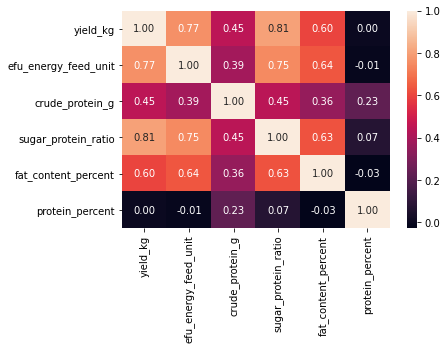

In [38]:
sns.heatmap(main_df.drop('id', axis = 1).corr(), annot=True, fmt='.2f');

Целевой признак - `yield_kg`. Он связан с входными признаками следующим образом: `efu_energy_feed_unit` - 0.77, `crude_protein_g` - 0.45, `sugar_protein_ratio` - 0.81, `fat_content_percent` - 0.60, `protein_percent` - 0.00. Последний признак не проявляет никакой связи с целевым - его можно не учитывать в дальнейшем

Для построения диаграмм рассеяния для начала избавимся от ненужного признака `protein_percent`:


In [39]:
main_df = main_df.drop('protein_percent', axis = 1)

Напишем функцию для построение диаграмм рассеяния с учетом категориальных признаков:

In [40]:
def scatters(df, target, category):    
    for col in categorize_columns(df)[0]:
        if col != target:
            sns.lmplot(x=target, y=col, hue=category, data=df, height=7, aspect=1.2)
            #sns.scatterplot(x = df[target], y = df[col], hue=df[category]);
            plt.grid(True)
            plt.show();

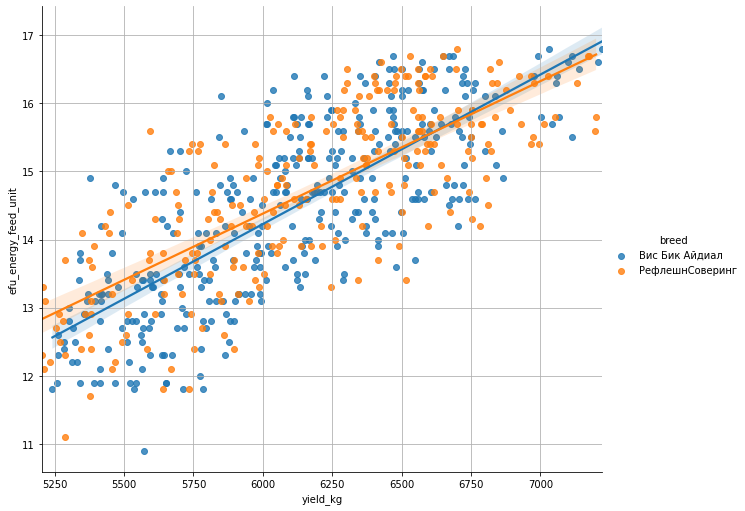

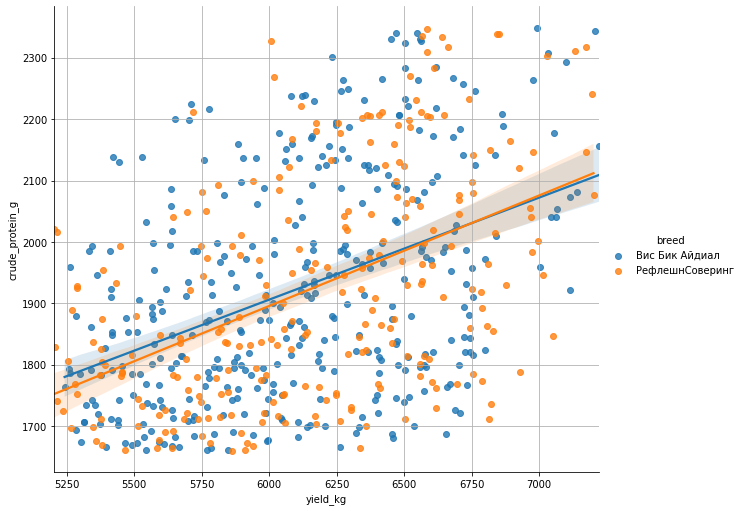

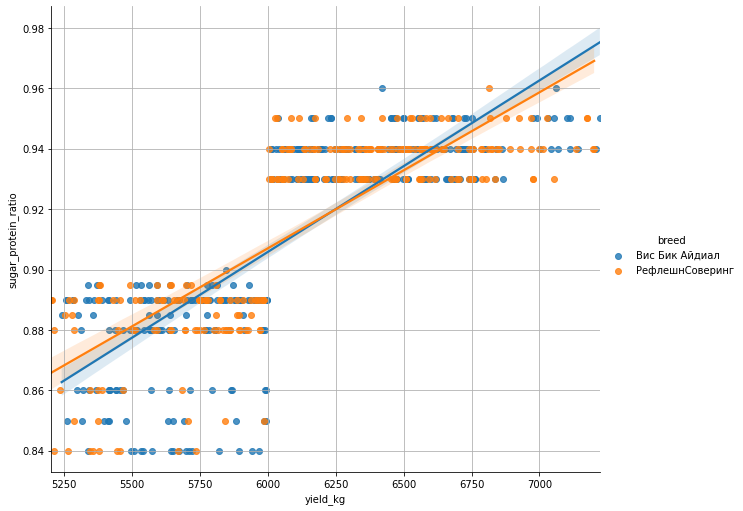

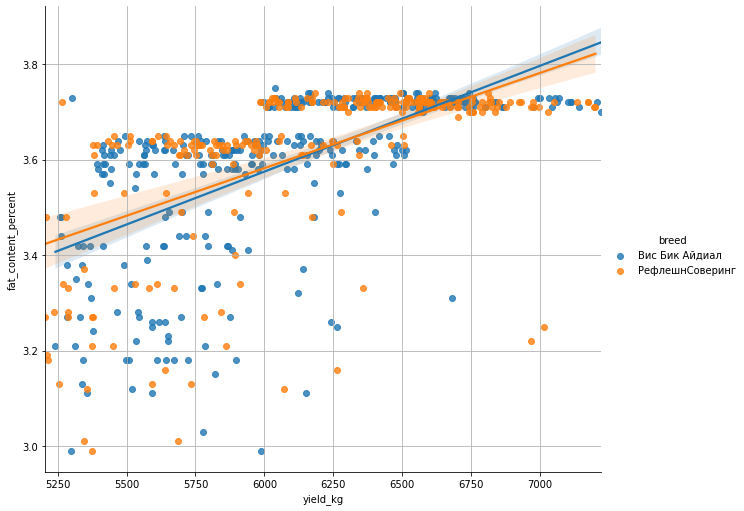

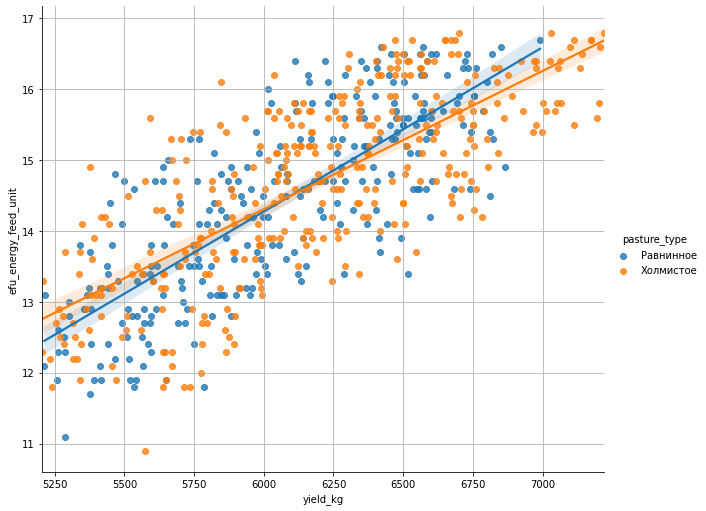

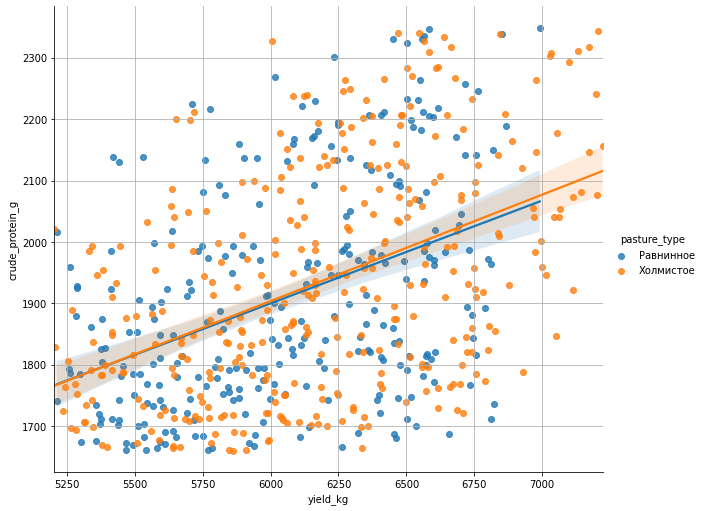

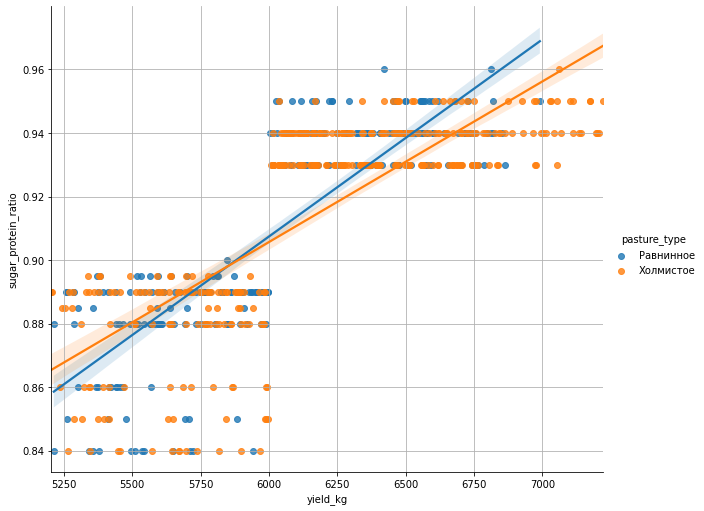

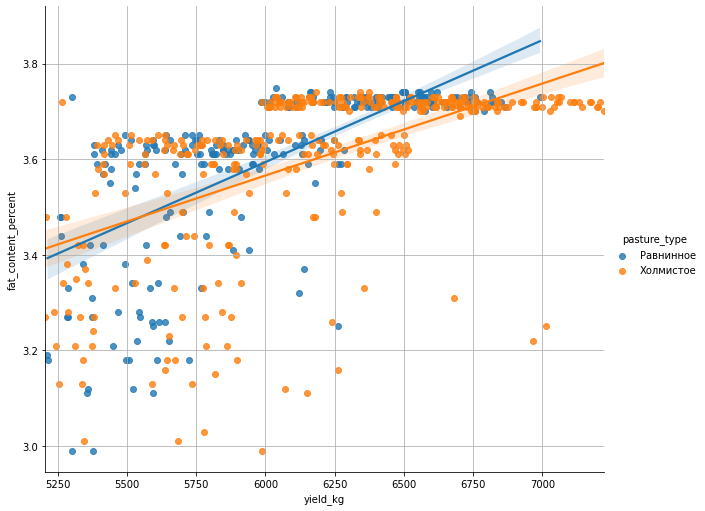

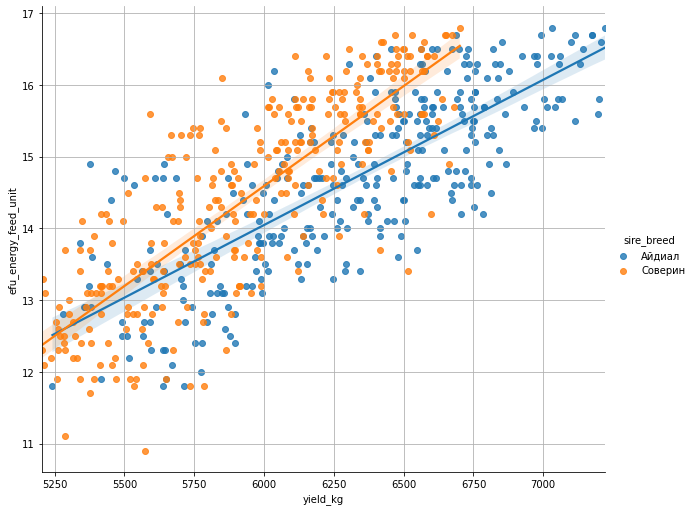

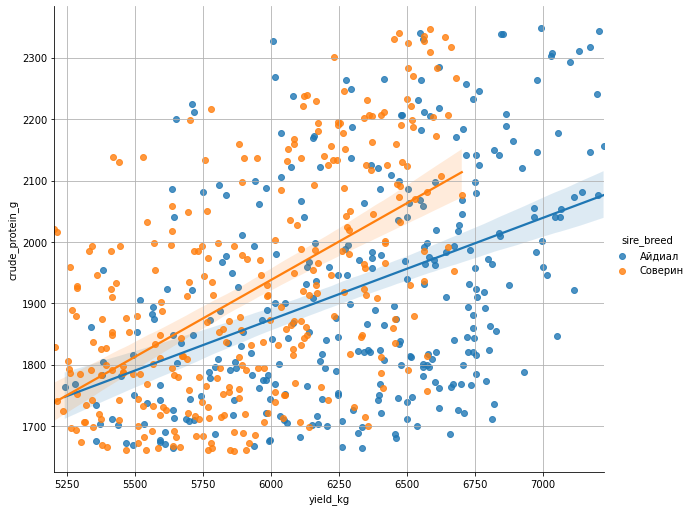

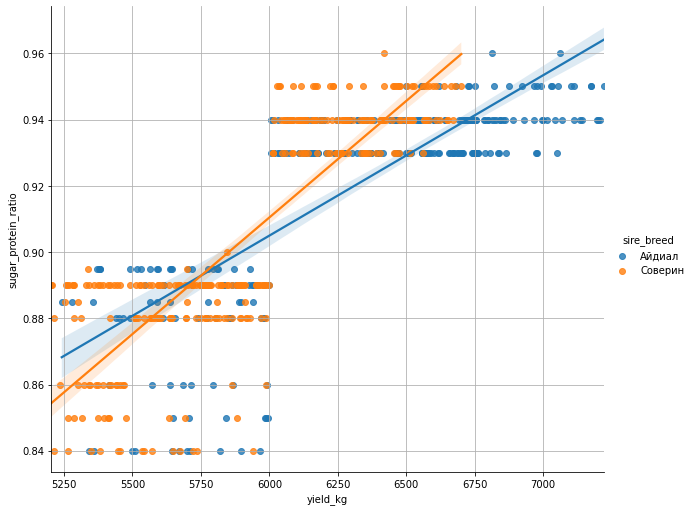

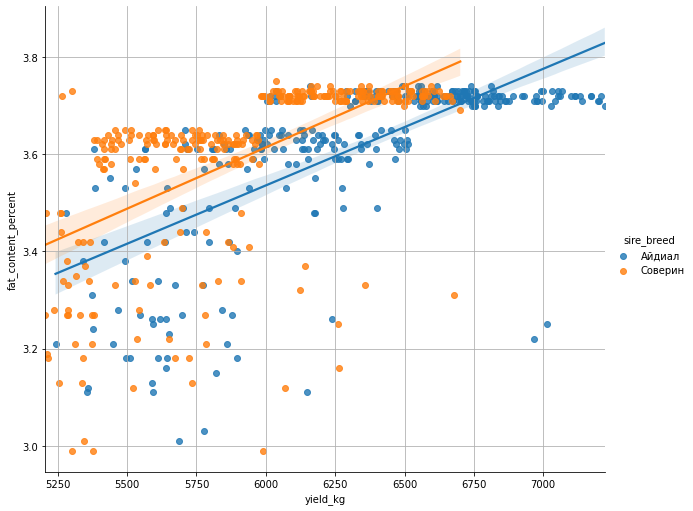

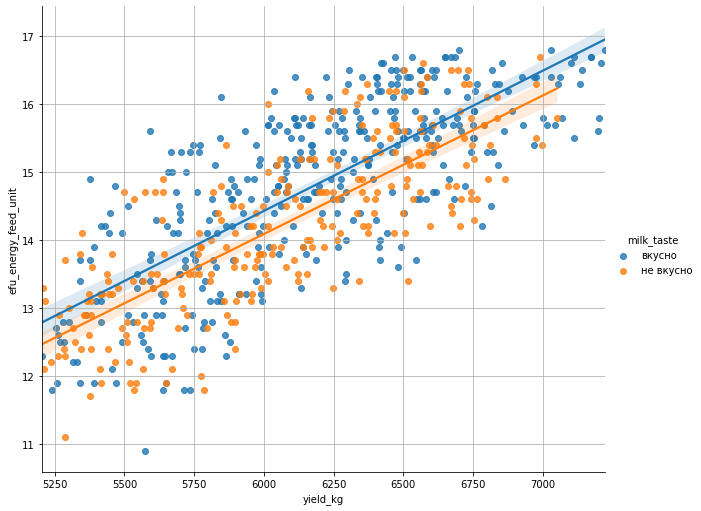

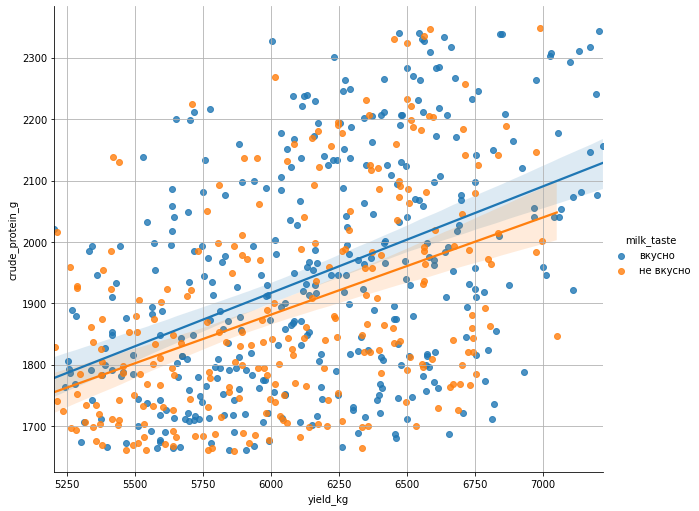

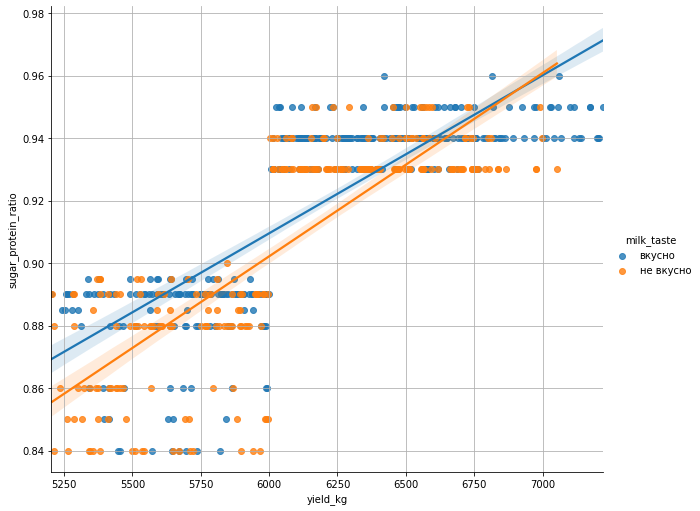

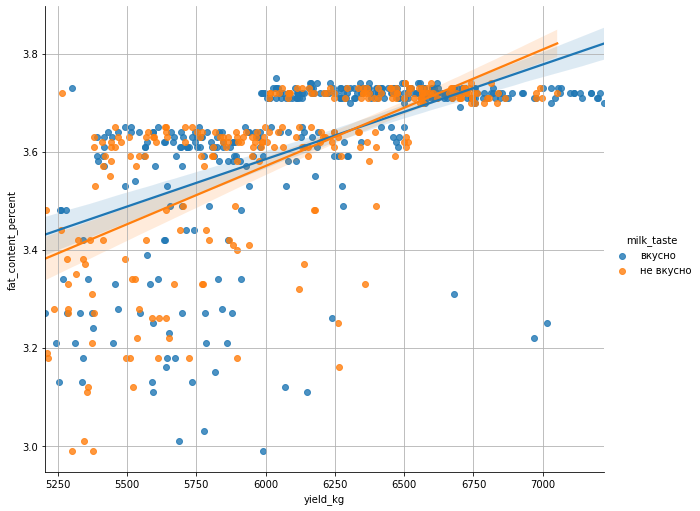

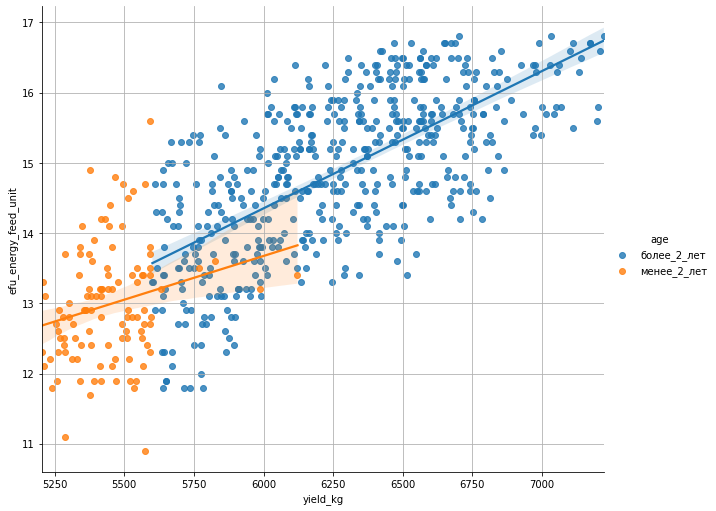

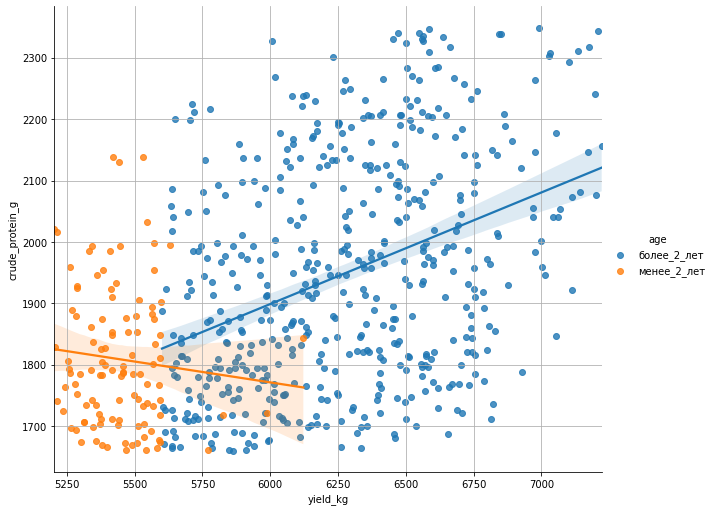

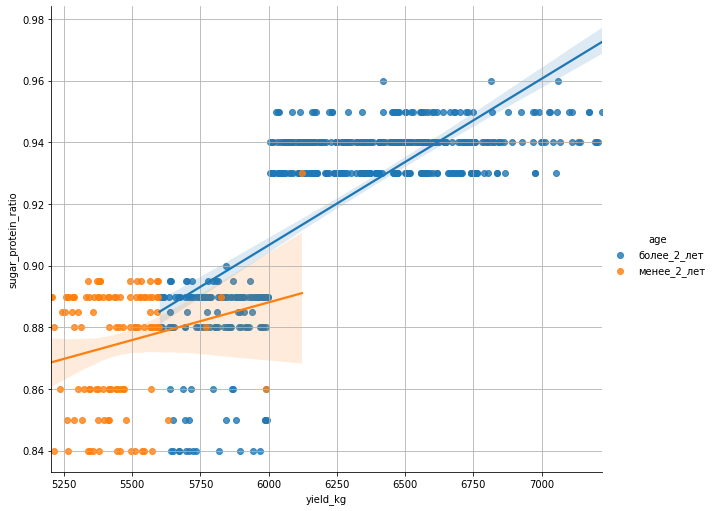

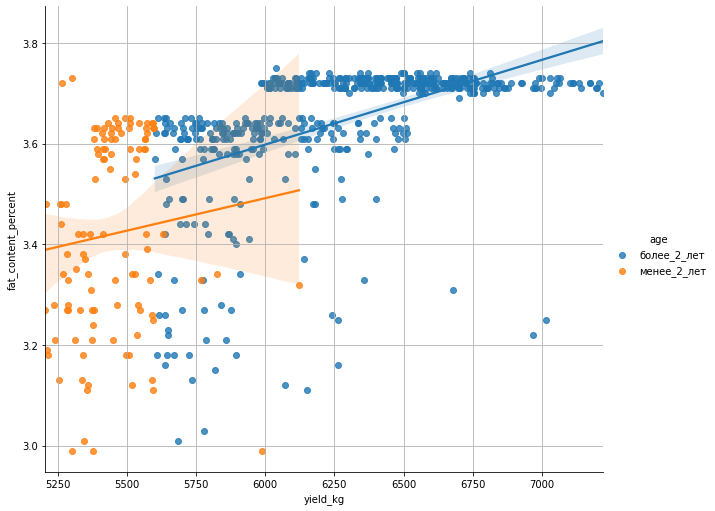

In [41]:
for col in categorize_columns(main_df)[1]:
    scatters(main_df, 'yield_kg', col)

Признаки `sugar_protein_ratio` и `fat_content_percent` проявляют дискретность.

У целевого признака `yield_kg` сильная положительная связь c `sugar_protein_ratio` (0.81) и `efu_energy_feed_unit` (0.77). Умеренная связь c `fat_content_percent` (0.60) и `crude_protein_g` (0.45). 

Входные признаки также коррелириуют между собой:

Коэфф. корр. `efu_energy_feed_unit` и `sugar_protein_ratio` = 0.75 

Коэфф. корр `sugar_protein_ratio` и `fat_content_percent` = 0.63 

Коэфф. корр `fat_content_percent` и `efu_energy_feed_unit` = 0.64 

Категориальные признаки для модели:
1. `breed` - Судя по графикам, от породы коровы мало что зависит, либо эти породы похожи.
2. `pasture_type` - Можно проследить тренд.
3. `sire_breed` - Явно прослеживаются разные тренды.
4. `milk_taste` - Тренд не прослеживается.
5. `age` - Явно прослеживаются разные тренды. Оставим признак.

Все количественные признаки (удой, протеин, калорийность) имеют чёткую положительную корреляцию - чем выше удой, тем выше содержание белка и калорийность корма.

Следующие числовые признаки будут преобразованы в категориальные бинарные признаки по причине их дискретности: `sugar_protein_ratio`, `fat_content_percent`. Также нелинейно связан входной признак `efu_energy_feed_unit` с целевым признаком `yield_kg`.

## Обучение модели линейной регрессии

Напишем функцию для линейной регрессии:

In [42]:
def linreg(df):    
    X = df.drop('yield_kg', axis = 1)
    y = df['yield_kg']

    #Передадим названия категориальных и числовых признаков из Х
    cat_col = categorize_columns(X)[1]
    num_col = categorize_columns(X)[0]

    

    #Разделим выборку
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    #Подготовим признаки
    encoder = OneHotEncoder(drop='first', sparse=False)
    scaler = StandardScaler()

    #Обучим модель на категориальных данных и применим к X_train и X_test
    X_train_ohe = encoder.fit_transform(X_train[cat_col])
    X_test_ohe = encoder.transform(X_test[cat_col])

    #Обучим модель на числовых данных и применим к X_train и X_test
    X_train_scaled = scaler.fit_transform(X_train[num_col])
    X_test_scaled = scaler.transform(X_test[num_col])

    #Запишем новые имена категориальных столбцов
    encoder_col_names = encoder.get_feature_names()

    #Объеденим трансформированные категориальные и числовые столбцы
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    #Обучим модель
    model_lr = LinearRegression()

    model_lr.fit(X_train, y_train)

    #Сделаем предсказания
    predictions = model_lr.predict(X_test)

    #Посчитаем остатки
    residuals = y_test - predictions

    #Построим гистограмму распределения остатков
    plt.hist(residuals)
    plt.xlabel('Остатки')
    plt.ylabel('Остатки')
    plt.title('Гистограмма распределения остатков')
    plt.grid(True)
    plt.show();

    #Построим диаграмму рассеяния остатков по предсказаниям
    plt.scatter(predictions, residuals)
    plt.xlabel('Предсказания модели')
    plt.ylabel('Остатки')
    plt.title('Анализ дисперсии')
    plt.grid(True)
    plt.show();

    # Рассчитаем значения метрик
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mse**0.5
    
    
    lower_q = np.percentile(residuals, 5)
    upper_q = np.percentile(residuals, 95)
   
    
    
    return mse, mae, rmse, r2, lower_q, upper_q, model_lr, encoder, scaler

    print(f'R2 LinearRegression = {r2:.2f}')

Подготовим выборки и обучим модель:

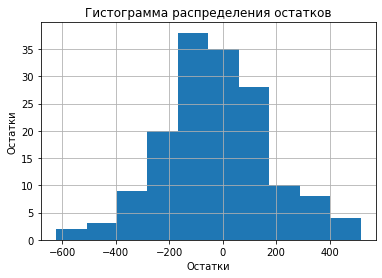

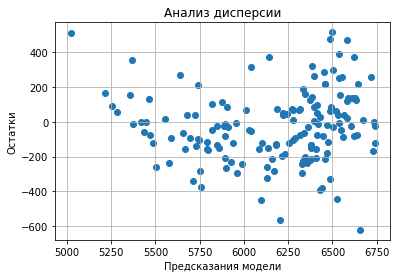

mse =  41876.77142362127
mae =  159.57218068725982
rmse =  204.63814752782844
r2 =  0.7942830116854828
lower_q =  -330.29834842864494
upper_q =  327.6354509841186


In [43]:
prep_df1 = main_df
mse1, mae1, rmse1, r2_1, lower_q1, upper_q1, model_lr1, encoder1, scaler1 = linreg(prep_df1)

print('mse = ', mse1)
print('mae = ', mae1)
print('rmse = ', rmse1)
print('r2 = ', r2_1)
print('lower_q = ', lower_q1)
print('upper_q = ', upper_q1)


Гистограмма распределения остатков показывает гауссово распределение почти симметрично вокруг нуля.  

Остатки увеличиваются при росте предсказаний.

Модель хорошо себя показывает в 79% случаев.

Введем признак ЭКЕ^2 для устранения нелинейности:

In [44]:
prep_df2 = main_df

In [45]:
prep_df2['efu_square'] = prep_df2['efu_energy_feed_unit']**2

Сделаем столбец `sugar_protein_ratio` дискретным. Разделим его на две категории: до 0.91 низкие содержание, от 0.91 высокое содержание.

In [46]:
prep_df2['sugar_protein_ratio_cat'] = prep_df2['sugar_protein_ratio'].apply(
    lambda x: 'низкое содержание' if x < 0.91 
    else 'высокое содержание'
)

Сделаем столбец `fat_content_percent` дискретным. Разделим его на две категории: до 3.69 низкое содержание, от 3.69 высокое содержание.

In [47]:
prep_df2['fat_content_percent_cat'] = prep_df2['fat_content_percent'].apply(
    lambda x: 'низкое содержание' if x < 3.6
    else 'высокое содержание'
)

Обучим модель с учетом измененных данных:

In [48]:
prep_df2 = prep_df2.drop(['efu_energy_feed_unit', 'sugar_protein_ratio','fat_content_percent'], axis = 1)

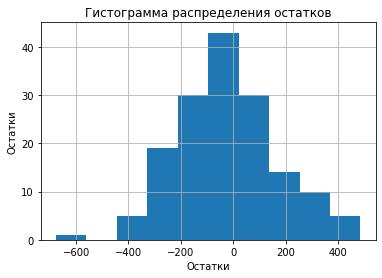

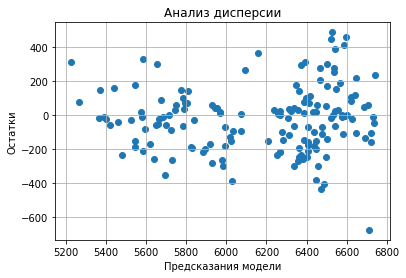

mse =  36805.74997042343
mae =  146.7812588831338
rmse =  191.84824724355298
r2 =  0.8191940835175805
lower_q =  -298.2647405668513
upper_q =  310.2851739619635


In [49]:
mse2, mae2, rmse2, r2_2, lower_q2, upper_q2, model_lr2, encoder2, scaler2 = linreg(prep_df2)

print('mse = ', mse2)
print('mae = ', mae2)
print('rmse = ', rmse2)
print('r2 = ', r2_2)
print('lower_q = ', lower_q2)
print('upper_q = ', upper_q2)

Гистограмма распределения остатков показывает гауссово распределение почти симметрично вокруг нуля.  

Остатки уже не так сильно увеличиваются при росте предсказаний.

Модель хорошо себя показывает в 82% случаев.

Добавим признак `sire_name` и обучим модель:

In [50]:
prep_df3 = prep_df2.merge(sire_df, on='id', how='left')
prep_df3 = prep_df3[sorted(prep_df3.columns)]

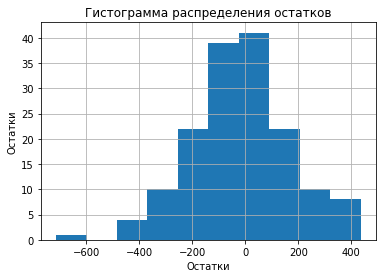

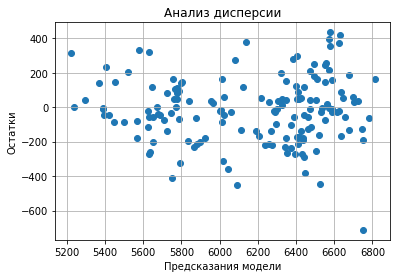

mse =  35585.49195454336
mae =  145.2015379661884
rmse =  188.6411724797727
r2 =  0.8251885237635613
lower_q =  -291.48311103453415
upper_q =  315.7744360055137


In [51]:
mse3, mae3, rmse3, r2_3, lower_q3, upper_q3, model_lr3, encoder3, scaler3 = linreg(prep_df3)

print('mse = ', mse3)
print('mae = ', mae3)
print('rmse = ', rmse3)
print('r2 = ', r2_3)
print('lower_q = ', lower_q3)
print('upper_q = ', upper_q3)

Гистограмма распределения остатков показывает гауссово распределение почти симметрично вокруг нуля.  

Остатки все еще зависят от величины предсказания.

Модель хорошо себя показывает в 83% случаев.

Выведем таблицу с ошибками всех трех моделей:

In [52]:
errors_df = pd.DataFrame({'model': ['prep_df1', 'prep_df2', 'prep_df3'], 'mse': [mse1, mse2, mse3], 
                          'mae ': [mae1, mae2, mae3], 'rmse': [rmse1, rmse2, rmse3], 
                          'r2': [r2_1, r2_2, r2_3]})
errors_df

,model,mse,mae,rmse,r2
0,prep_df1,41876.771424,159.572181,204.638148,0.794283
1,prep_df2,36805.749970,146.781259,191.848247,0.819194
2,prep_df3,35585.491955,145.201538,188.641172,0.825189


90%-й доверительный интервал ошибки третьей модели: (-291.48, 315.77)

Лучший коэффициент детерминации показала третья модель - 0.83.

По изменению графиков видно, что модель стала меньше систематически ошибаться. Остатки равномерно распределены вокруг 0, смещений в сторону почти нет.

Третья модель показывает себя лучше всех. Применим ее к новым данным:

Сначала приведем cow_df к нужному виду:

In [53]:
cow_prep_df = cow_df.drop('current_protein_level_percent', axis = 1)
cow_prep_df

,breed,pasture_type,sire_breed,sire_name,current_fat_content_percent,age,efu_energy_feed_unit,crude_protein_g,sugar_protein_ratio,milk_taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,более_2_лет,15.519894,2031.228723,0.966298,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,менее_2_лет,13.588370,1899.929348,0.919435,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,более_2_лет,15.785745,2046.271277,0.969500,вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,более_2_лет,15.785745,2046.271277,0.969500,вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,более_2_лет,13.588370,1899.929348,0.919435,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,менее_2_лет,13.912500,1894.462500,0.918094,вкусно
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,более_2_лет,15.519894,2031.228723,0.966298,вкусно
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,менее_2_лет,15.519894,2031.228723,0.966298,вкусно
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,более_2_лет,15.785745,2046.271277,0.969500,вкусно
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,более_2_лет,13.601538,1910.151923,0.918346,вкусно


In [54]:
cow_prep_df['sugar_protein_ratio_cat'] = cow_prep_df['sugar_protein_ratio'].apply(
    lambda x: 'низкое содержание' if x < 0.91 
    else 'высокое содержание'
)

In [55]:
cow_prep_df['fat_content_percent_cat'] = cow_prep_df['current_fat_content_percent'].apply(
    lambda x: 'низкое содержание' if x < 3.6
    else 'высокое содержание'
)

In [56]:
cow_prep_df['efu_square'] = cow_prep_df['efu_energy_feed_unit']**2

In [57]:
cow_prep_df = cow_prep_df.drop(['efu_energy_feed_unit', 'sugar_protein_ratio', 'current_fat_content_percent'], axis = 1)
cow_prep_df = cow_prep_df[sorted(cow_prep_df.columns)]
cow_prep_df

,age,breed,crude_protein_g,efu_square,fat_content_percent_cat,milk_taste,pasture_type,sire_breed,sire_name,sugar_protein_ratio_cat
0,более_2_лет,Вис Бик Айдиал,2031.228723,240.867098,низкое содержание,вкусно,Холмистое,Айдиал,Геркулес,высокое содержание
1,менее_2_лет,Вис Бик Айдиал,1899.929348,184.643787,низкое содержание,не вкусно,Равнинное,Соверин,Буйный,высокое содержание
2,более_2_лет,РефлешнСоверинг,2046.271277,249.189735,низкое содержание,вкусно,Равнинное,Соверин,Барин,высокое содержание
3,более_2_лет,РефлешнСоверинг,2046.271277,249.189735,низкое содержание,вкусно,Холмистое,Айдиал,Буйный,высокое содержание
4,более_2_лет,РефлешнСоверинг,1899.929348,184.643787,высокое содержание,не вкусно,Равнинное,Айдиал,Буйный,высокое содержание
5,менее_2_лет,РефлешнСоверинг,1894.462500,193.557656,высокое содержание,вкусно,Равнинное,Соверин,Геркулес,высокое содержание
6,более_2_лет,Вис Бик Айдиал,2031.228723,240.867098,низкое содержание,вкусно,Равнинное,Соверин,Буйный,высокое содержание
7,менее_2_лет,РефлешнСоверинг,2031.228723,240.867098,низкое содержание,вкусно,Холмистое,Айдиал,Буйный,высокое содержание
8,более_2_лет,Вис Бик Айдиал,2046.271277,249.189735,высокое содержание,вкусно,Холмистое,Соверин,Соловчик,высокое содержание
9,более_2_лет,РефлешнСоверинг,1910.151923,185.001849,высокое содержание,вкусно,Равнинное,Соверин,Геркулес,высокое содержание


In [58]:
prep_df3

,age,breed,crude_protein_g,efu_square,fat_content_percent_cat,id,milk_taste,pasture_type,sire_breed,sire_name,sugar_protein_ratio_cat,yield_kg
0,более_2_лет,Вис Бик Айдиал,1743,201.64,низкое содержание,1,вкусно,Равнинное,Айдиал,Буйный,низкое содержание,5863
1,менее_2_лет,Вис Бик Айдиал,2138,163.84,низкое содержание,2,вкусно,Равнинное,Соверин,Соловчик,низкое содержание,5529
2,более_2_лет,РефлешнСоверинг,1854,196.00,низкое содержание,3,не вкусно,Холмистое,Соверин,Барин,низкое содержание,5810
3,более_2_лет,РефлешнСоверинг,2012,153.76,низкое содержание,4,не вкусно,Холмистое,Айдиал,Буйный,низкое содержание,5895
4,менее_2_лет,Вис Бик Айдиал,1675,163.84,высокое содержание,5,вкусно,Равнинное,Соверин,Барин,низкое содержание,5302
...,...,...,...,...,...,...,...,...,...,...,...,...
623,более_2_лет,РефлешнСоверинг,1964,237.16,высокое содержание,625,не вкусно,Равнинное,Айдиал,Буйный,высокое содержание,6812
624,менее_2_лет,РефлешнСоверинг,1700,166.41,высокое содержание,626,вкусно,Равнинное,Соверин,Барин,низкое содержание,5513
625,более_2_лет,РефлешнСоверинг,1837,207.36,высокое содержание,627,не вкусно,Холмистое,Соверин,Барин,низкое содержание,5970
626,более_2_лет,РефлешнСоверинг,1994,190.44,высокое содержание,628,вкусно,Равнинное,Соверин,Барин,низкое содержание,5746


Проверим, совпадают ли размерности таблиц:

In [59]:
cow_prep_df.shape[1] == prep_df3.drop(['id', 'yield_kg'], axis=1).shape[1]

True

Применим обученную модель:

In [60]:
cat_col = categorize_columns(cow_prep_df)[1]
num_col = categorize_columns(cow_prep_df)[0]


cow_prep_df_scaled = scaler3.transform(cow_prep_df[num_col])
cow_prep_df_ohe = encoder3.transform(cow_prep_df[cat_col])

encoder_col_names = encoder3.get_feature_names()

cow_prep_df_ohe = pd.DataFrame(cow_prep_df_ohe, columns=encoder_col_names)

cow_prep_df_scaled = pd.DataFrame(cow_prep_df_scaled, columns=num_col)

cow_prep_df_test = pd.concat([cow_prep_df_ohe, cow_prep_df_scaled], axis=1)

predictions = model_lr3.predict(cow_prep_df_test)

predictions

array([6597.56817658, 6112.57047315, 6303.16388415, 6619.78141713,
       6314.8170484 , 6205.49116687, 6550.29262917, 6394.96590104,
       6411.89225407, 6358.83648924, 6401.2316403 , 6139.9254627 ,
       6619.78141713, 6391.89248294, 6445.90314338, 6550.29262917])

По пресказанию модели все коровы дадут больше 6000 кг. С учетом нижней границы, уже не все коровы гарантированно пройдут отбор.

Добавим результат в датафрейм:

In [61]:
cow_prep_df['yield_kg'] = predictions

## Обучение модели логистической регрессии

Напишем функцию для логистической регрессии с возможностью выбора значение порога:

In [80]:
def logreg(df, rec_prob):
    
    X = df.drop('milk_taste', axis = 1)
    y = df['milk_taste']
    
    
    #Передадим названия категориальных и числовых признаков из Х
    cat_col = categorize_columns(X)[1]
    num_col = categorize_columns(X)[0]

    

    #Разделим выборку
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    #Подготовим признаки
    encoder = OneHotEncoder(drop='first', sparse=False)
    scaler = StandardScaler()

    #Обучим модель на категориальных данных и применим к X_train и X_test
    X_train_ohe = encoder.fit_transform(X_train[cat_col])
    X_test_ohe = encoder.transform(X_test[cat_col])

    #Обучим модель на числовых данных и применим к X_train и X_test
    X_train_scaled = scaler.fit_transform(X_train[num_col])
    X_test_scaled = scaler.transform(X_test[num_col])

    #Запишем новые имена категориальных столбцов
    encoder_col_names = encoder.get_feature_names()

    #Объеденим трансформированные категориальные и числовые столбцы
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    # создаём объект для работы с моделью
    clf = SVC(probability=True)

    # обучаем модель на данных
    clf = clf.fit(X_train, y_train)

    # получаем прогнозные метки классов
    y_pred = clf.predict(X_test)
    
    y_proba = clf.predict_proba(X_test)[:,1]
    
    y_proba_mod = pd.Series(y_proba)
 
    # Категоризируем данные
    y_proba_mod = y_proba_mod.apply(
         lambda x: 0 if x < rec_prob 
         else 1
    )
    # проводим оценку точности
    acc = accuracy_score(y_test, y_proba_mod)
    
    cm = confusion_matrix(y_test, y_proba_mod)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted'); 
    plt.title('Матрица ошибок')
    plt.show()
    
    
    
    recall = recall_score(y_test, y_proba_mod) 
    precision = precision_score(y_test, y_proba_mod)
    return acc, recall, precision, clf, encoder, scaler

Подготовим данные:

In [81]:
prep_df4 = prep_df3

#Заменим значения столбца milk_taste на 1 и 0, чтобы модель работала:
prep_df4.loc[prep_df4['milk_taste'] == 'не вкусно', 'milk_taste'] = 0
prep_df4.loc[prep_df4['milk_taste'] == 'вкусно', 'milk_taste'] = 1
prep_df4['milk_taste'] = prep_df4['milk_taste'].astype(int)

#Удалим имена быков, потому что их нет в нужном датафрейме:
prep_df4 = prep_df4.drop(['sire_name'], axis=1)

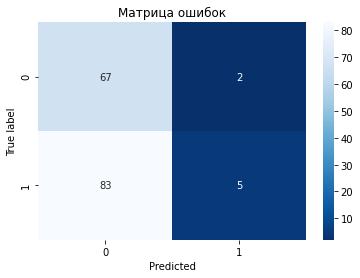

(0.4585987261146497, 0.056818181818181816, 0.7142857142857143)

In [98]:
acc, recall, precision, clf, encoder4, scaler4 = logreg(prep_df4, 0.73)
acc, recall, precision

In [129]:
def svc_with_precision_target(df, target_column, required_precision=0.95):
    # Разделяем данные
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Разделяем на train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
    
    # Кодируем категориальные, масштабируем числовые
    encoder = OneHotEncoder(drop='first', sparse=False)
    scaler = StandardScaler()

    X_train_cat = encoder.fit_transform(X_train[cat_cols])
    X_test_cat = encoder.transform(X_test[cat_cols])

    X_train_num = scaler.fit_transform(X_train[num_cols])
    X_test_num = scaler.transform(X_test[num_cols])

    X_train_transformed = np.hstack([X_train_num, X_train_cat])
    X_test_transformed = np.hstack([X_test_num, X_test_cat])

    # Обучаем SVC с вероятностями
    clf = SVC(probability=True, random_state=42, kernel='poly',degree=3)
    clf.fit(X_train_transformed, y_train)

    # Получаем предсказанные вероятности для теста
    y_proba = clf.predict_proba(X_test_transformed)[:, 1]
    
    # Подбор порога для нужной precision
    best_threshold = 0.5  # базовый
    best_precision = 0
    
    thresholds = np.linspace(0.1, 0.99, 100)  # проверим разные пороги
    
    for threshold in thresholds:
        y_pred = (y_proba > threshold).astype(int)
        precision = precision_score(y_test, y_pred)
        
        if precision >= required_precision:
            best_threshold = threshold
            best_precision = precision
            break  # нашли первый порог, где precision достаточный

    # Итоговое предсказание с найденным порогом
    y_pred_final = (y_proba > best_threshold).astype(int)

    # Метрики для отчёта
    final_accuracy = accuracy_score(y_test, y_pred_final)
    final_recall = recall_score(y_test, y_pred_final)
    final_precision = precision_score(y_test, y_pred_final)
    
    cm = confusion_matrix(y_test, y_pred_final)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted'); 
    plt.title('Матрица ошибок')
    plt.show()
    
    
    print(f"Требуемая Precision: {required_precision:.2f}")
    print(f"Найденная Precision: {final_precision:.2f}")
    print(f"Порог: {best_threshold:.2f}")
    print(f"Accuracy: {final_accuracy:.2f}")
    print(f"Recall: {final_recall:.2f}")
    
    return clf, encoder, scaler, best_threshold

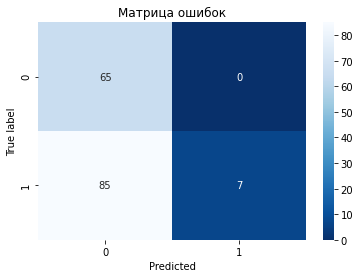

Требуемая Precision: 0.92
Найденная Precision: 1.00
Порог: 0.76
Accuracy: 0.46
Recall: 0.08


In [130]:
clf, encoder, scaler, best_threshold = svc_with_precision_target(prep_df4, 'milk_taste', required_precision=0.92)

Так как главная цель — купить корову с вкусным молоком, критичнее ошибка I рода. Если заказчик купит корову, дающую невкусное молоко, это принесёт прямые убытки. Для этого выберем значение порога равное 0.803. Так мы получим максимальное число коров с вкусным молоком (8). Accuracy = 0.49; Recall = 0.09; precision = 1.0.

Проверим, совпадают ли размерности таблиц:

In [ ]:
cow_prep_df.drop(['sire_name'], axis = 1).shape[1] == prep_df4.drop(['id'], axis=1).shape[1]

Удалим лишнее:

In [ ]:
cow_prep_df = cow_prep_df.drop(['sire_name', 'milk_taste'], axis = 1)

Запустим модель:

In [ ]:
cat_col = categorize_columns(cow_prep_df)[1]
num_col = categorize_columns(cow_prep_df)[0]


cow_prep_df_scaled = scaler4.transform(cow_prep_df[num_col])
cow_prep_df_ohe = encoder4.transform(cow_prep_df[cat_col])

encoder_col_names = encoder4.get_feature_names()

cow_prep_df_ohe = pd.DataFrame(cow_prep_df_ohe, columns=encoder_col_names)
cow_prep_df_scaled = pd.DataFrame(cow_prep_df_scaled, columns=num_col)

cow_prep_df_test = pd.concat([cow_prep_df_ohe, cow_prep_df_scaled], axis=1)

predictions = clf.predict(cow_prep_df_test)

predictions

Добавим результаты в таблицу и вернем их к строчному типу:

In [ ]:
cow_prep_df['milk_taste_num'] = predictions

In [ ]:
cow_prep_df['milk_taste'] = cow_prep_df['milk_taste_num'].apply(
    lambda x: 'не вкусно' if x == 0 
    else 'вкусно'
)

In [ ]:
cow_prep_df = cow_prep_df.drop('milk_taste_num', axis = 1)

Найдем коров, которые практически гарантированно дадут больше 6000 кг молока:

In [ ]:
cow_prep_df['yield_kg_lower_q'] = cow_prep_df['yield_kg'] + lower_q3

In [ ]:
cow_bargain = cow_prep_df.query('milk_taste == "вкусно" and yield_kg_lower_q > 6000')
cow_bargain

Выше представлена таблица коров, которых стоих купить. У них с высокой точностью будет вкусное молоко и удой с вероятностью 95% будет не ниже, чем в столбце `yield_kg_lower_q`.

## Итоговые выводы

1. Названия столбцов записаны в требуемом виде, явные дубликаты удалены, неявные дубликаты исправлены, пропуски не найдены, значения в таблицах придены к правильным типам. Удалено одно ошибочно записанное значение. В `cow_df` добавлены недостающие значения.


2. 

    1. main_df: Кандидаты на категоризацию - sugar_protein_ration и fat_content_percent. По категориальным признакам почти везде равенство за исключением возраста - большинство коров старше 2 лет. Несмотря на такую разницу, это нельзя связать со вкусом молока, потому что так не такое сильное различие и вкус вообще может зависеть от факторов вне этих данных. Все категориальные столбцы бинарные.

    2. cow_df: Почти все данные получились дискретными из-за способа их подстановки.


3. Целевой признак - `yield_kg`. Он связан с входными признаками следующим образом: `efu_energy_feed_unit` - 0.77, `crude_protein_g` - 0.45, `sugar_protein_ratio` - 0.81, `fat_content_percent` - 0.60, `protein_percent` - 0.00. Последний признак не проявляет никакой связи с целевым - его можно не учитывать в дальнейшем. Входные признаки также коррелириуют между собой: Коэфф. корр. `efu_energy_feed_unit` и `sugar_protein_ratio` = 0.75, Коэфф. корр `sugar_protein_ratio` и `fat_content_percent` = 0.63, Коэфф. корр `fat_content_percent` и `efu_energy_feed_unit` = 0.64. Все количественные признаки (удой, протеин, калорийность) имеют чёткую положительную корреляцию - чем выше удой, тем выше содержание белка и калорийность корма. Следующие числовые признаки преобразованы в категориальные бинарные признаки по причине их дискретности: `sugar_protein_ratio`, `fat_content_percent`. Также нелинейно связан входной признак `efu_energy_feed_unit` с целевым признаком `yield_kg`.


4. По пресказанию модели все коровы дадут больше 6000 кг. С учетом нижней границы, уже не все коровы гарантированно пройдут отбор.


5. Главная цель — купить корову с вкусным молоком, критичнее ошибка I рода. Со значением порога 0.803 получим максимальное число коров с вкусным молоком (8). Accuracy = 0.49; Recall = 0.09; precision = 1.0.


6. Отобрано 10 подходящих коров.


7. Рекомендации: 6000 кг с коровы это очень мало. Надо менять производство.


8. Модели получились не очень точными. Я так и не понял, все ли признаки правильно обработал и почему, например кормовая единицу мы возвели в квадрат. Как понять, что она нелинейно связана с удоем?


9. Наверняка улучшить возможно с помощью доп. методов. Но я больше не вижу как ее можно улучшить.


10. В нашем случае Recall важен, если цель предсказать всех невкусных коров, а Precision - если корова стоит слишком дорого, чтобы рисковать. Лучше отбросить многих нужных коров, но гарантированно купить то, что попадает под критерии.